City of Los Angeles crime data from 2020 to current date

### Problem statement: Find out the area where the crime rate is higher and where the los angeles coup should priortize highly

In [1449]:
import numpy as np 
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [1450]:
df = pd.read_csv("/Users/mrbinit/Downloads/Crime_Data_from_2020_to_Present.csv")

In [1451]:
df.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
5,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,NaN,NaN,700 S BROADWAY,NaN,34.0452,-118.2534
6,200100502,01/02/2020 12:00:00 AM,01/02/2020 12:00:00 AM,1315,1,Central,161,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,998.0,NaN,NaN,700 S FIGUEROA ST,NaN,34.0483,-118.2631
7,200100504,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,40,1,Central,155,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,998.0,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
8,200100507,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,200,1,Central,101,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,998.0,NaN,NaN,700 BERNARD ST,NaN,34.0677,-118.2398
9,201710201,06/19/2020 12:00:00 AM,05/26/2020 12:00:00 AM,1925,17,Devonshire,1708,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,AO,Adult Other,341.0,NaN,NaN,NaN,11900 BALBOA BL,NaN,34.2864,-118.5021


In [1452]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [1453]:
df.shape

(770787, 28)

In [1454]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770787 entries, 0 to 770786
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           770787 non-null  int64  
 1   Date Rptd       770787 non-null  object 
 2   DATE OCC        770787 non-null  object 
 3   TIME OCC        770787 non-null  int64  
 4   AREA            770787 non-null  int64  
 5   AREA NAME       770787 non-null  object 
 6   Rpt Dist No     770787 non-null  int64  
 7   Part 1-2        770787 non-null  int64  
 8   Crm Cd          770787 non-null  int64  
 9   Crm Cd Desc     770787 non-null  object 
 10  Mocodes         664916 non-null  object 
 11  Vict Age        770787 non-null  int64  
 12  Vict Sex        669964 non-null  object 
 13  Vict Descent    669958 non-null  object 
 14  Premis Cd       770778 non-null  float64
 15  Premis Desc     770334 non-null  object 
 16  Weapon Used Cd  268001 non-null  float64
 17  Weapon Des

In [1455]:
# Assuming you have a DataFrame called 'df' with the original column names
original_columns = ['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
                   'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
                   'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
                   'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
                   'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
                   'LON']

# New column names you want to set
new_columns = ['DR_NUMBER', 'Date_Reported', 'Date_Occurred', 'Time_Occurred', 'Area', 'Area_Name',
               'Report_District_Number', 'Part_Type', 'Crime_Code', 'Crime_Description', 'Modcodes',
               'Victim_Age', 'Victim_Sex', 'Victim_Descent', 'Premises_Code', 'Premises_Description',
               'Weapon_Used_Code', 'Weapon_Description', 'Status', 'Status_Description', 'Crime_Code_1',
               'Crime_Code_2', 'Crime_Code_3', 'Crime_Code_4', 'Location', 'Cross_Street', 'Latitude',
               'Longitude']

# Rename the columns
df.columns = new_columns

In [1456]:
df.head(10)

,DR_NUMBER,Date_Reported,Date_Occurred,Time_Occurred,Area,Area_Name,Report_District_Number,Part_Type,Crime_Code,Crime_Description,...,Status,Status_Description,Crime_Code_1,Crime_Code_2,Crime_Code_3,Crime_Code_4,Location,Cross_Street,Latitude,Longitude
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
5,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,NaN,NaN,700 S BROADWAY,NaN,34.0452,-118.2534
6,200100502,01/02/2020 12:00:00 AM,01/02/2020 12:00:00 AM,1315,1,Central,161,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,998.0,NaN,NaN,700 S FIGUEROA ST,NaN,34.0483,-118.2631
7,200100504,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,40,1,Central,155,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,998.0,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
8,200100507,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,200,1,Central,101,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,998.0,NaN,NaN,700 BERNARD ST,NaN,34.0677,-118.2398
9,201710201,06/19/2020 12:00:00 AM,05/26/2020 12:00:00 AM,1925,17,Devonshire,1708,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,AO,Adult Other,341.0,NaN,NaN,NaN,11900 BALBOA BL,NaN,34.2864,-118.5021


In [1457]:
df.Modcodes.value_counts()

0344                             31796
0329                             17462
1822 0344                         9166
1501                              7688
0344 1822                         6550
                                 ...  
0421 0913 1814 1300                  1
0945 0344 0325 0416 0444             1
0913 2000 0906 1816 0444 0408        1
0400 0444 1300 2004 1822             1
0601 0445 0416 0359                  1
Name: Modcodes, Length: 258897, dtype: int64

In [1458]:
df = df.drop(['DR_NUMBER', 'Status', 'Status_Description','Crime_Code_2', 'Crime_Code_3', 'Crime_Code_4', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported', 'Crime_Code', 'Victim_Sex', 'Premises_Code','Weapon_Used_Code','Victim_Age', 'Location', 'Modcodes'], axis = 1)

In [1459]:
df.head(10)

,Date_Occurred,Time_Occurred,Area,Area_Name,Report_District_Number,Part_Type,Crime_Description,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1
0,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,BATTERY - SIMPLE ASSAULT,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0
1,01/01/2020 12:00:00 AM,330,1,Central,163,2,BATTERY - SIMPLE ASSAULT,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,624.0
2,02/13/2020 12:00:00 AM,1200,1,Central,155,2,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,X,POLICE FACILITY,NaN,845.0
3,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,745.0
4,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",X,BEAUTY SUPPLY STORE,NaN,740.0
5,01/01/2020 12:00:00 AM,30,1,Central,163,1,"RAPE, FORCIBLE",H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,121.0
6,01/02/2020 12:00:00 AM,1315,1,Central,161,1,SHOPLIFTING - PETTY THEFT ($950 & UNDER),H,DEPARTMENT STORE,NaN,442.0
7,01/04/2020 12:00:00 AM,40,1,Central,155,2,OTHER MISCELLANEOUS CRIME,X,POLICE FACILITY,NaN,946.0
8,01/04/2020 12:00:00 AM,200,1,Central,101,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,341.0
9,05/26/2020 12:00:00 AM,1925,17,Devonshire,1708,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",X,OTHER BUSINESS,NaN,341.0


In [1460]:

from datetime import datetime

def military_to_regular_time(military_time):
    try:
        military_time_obj = datetime.strptime(str(military_time), '%H%M')
        regular_time = military_time_obj.strftime('%Y-%m-%d %H:%M:%S')
        return regular_time
    except ValueError:
        return military_time

# Convert military times to regular times in the Time_Occurred column
df['Date_Occurred'] = df['Date_Occurred'].apply(military_to_regular_time)
df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'])
df['Mnth'] = df['Date_Occurred'].dt.month
df['Day_of_week'] = df['Date_Occurred'].dt.day_name()



In [1461]:
df = df.drop('Date_Occurred', axis = 1)

### Converting military time

In [1462]:
from datetime import datetime

def military_to_regular_time(military_time):
    try:
        military_time_obj = datetime.strptime(str(military_time), '%H%M')
        regular_time = military_time_obj.strftime('%H:%M')
        return regular_time
    except ValueError:
        return military_time


# Convert military times to regular times in the Time_Occurred column
df['Time_Occurred'] = df['Time_Occurred'].apply(military_to_regular_time)

In [1463]:
df.Time_Occurred.head(10)

0    22:30
1    03:30
2    12:00
3    17:30
4    04:15
5    03:00
6    13:15
7    04:00
8    20:00
9    19:25
Name: Time_Occurred, dtype: object

In [1464]:
def military_to_regular_time(military_time):
    try:
        military_time_obj = datetime.strptime(str(military_time).zfill(4), '%H%M')
        regular_time = military_time_obj.strftime('%H:%M')
        return regular_time
    except ValueError:
        return military_time
df['Time_Occurred'] = df['Time_Occurred'].apply(military_to_regular_time)
morning_start = datetime.strptime('00:00', '%H:%M').time()
morning_end = datetime.strptime('11:59', '%H:%M').time()
# afternoon_start = datetime.strptime('12:00', '%H:%M').time()
# afternoon_end = datetime.strptime('17:59', '%H:%M').time()
evening_start = datetime.strptime('12:00', '%H:%M').time()
evening_end = datetime.strptime('23:59', '%H:%M').time()
def categorize_time(time):
    time_obj = datetime.strptime(str(time), '%H:%M').time()
    if morning_start <= time_obj <= morning_end:
        return 'Morning'
    elif evening_start <= time_obj <= evening_end:
        return 'Evening'
    else:
        return 'Night'
df['Time_Quarter'] = df['Time_Occurred'].apply(categorize_time)

In [1465]:
df.Time_Quarter.value_counts()

Evening    517105
Morning    253682
Name: Time_Quarter, dtype: int64

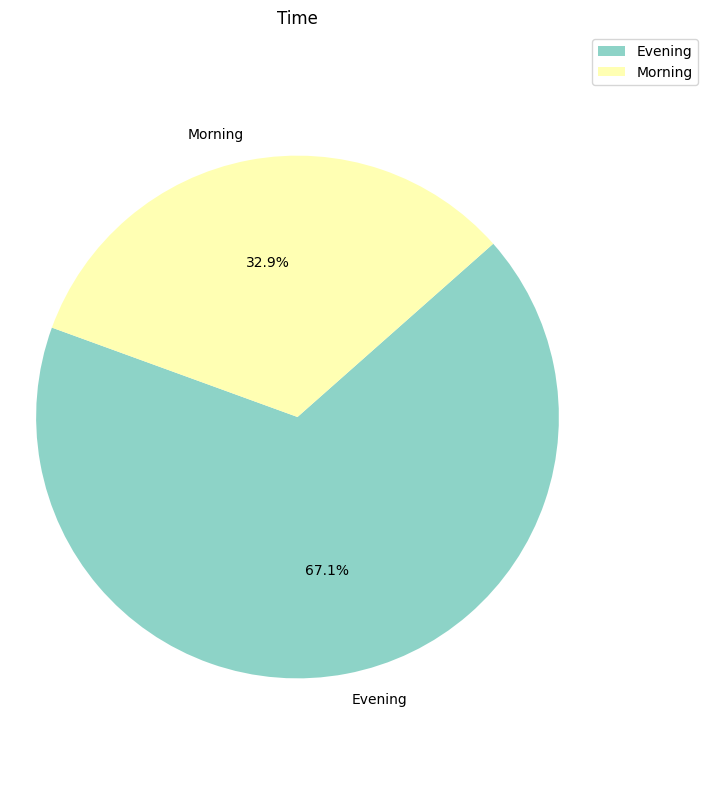

In [1466]:
bn=df.Time_Quarter.value_counts()
plt.figure(figsize=(10, 10))
plt.pie(bn.values, labels=bn.index, autopct='%1.1f%%', startangle=160, colors=sns.color_palette('Set3'), radius=0.8)
plt.title('Time', fontsize=12)
plt.axis('equal')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.subplots_adjust(right=0.7)
plt.show()

### Handling month

In [1467]:
def month_name(x):
    if x == 1:
        return 'Jan'
    elif x == 2:
        return 'Feb'
    elif x == 3:
        return 'Mar'
    elif x == 4:
        return 'Apr'
    elif x == 5:
        return 'May'
    elif x == 6:
        return 'Jun'
    elif x == 7:
        return 'Jul'
    elif x == 8:
        return 'Aug'
    elif x == 9:
        return 'Sep'
    elif x == 10:
        return 'Oct'
    elif x == 11:
        return 'Nov'
    elif x == 12:
        return 'Dec'

df['Month'] = df['Mnth'].apply(month_name)


In [1468]:
df = df.drop('Mnth', axis = 1)

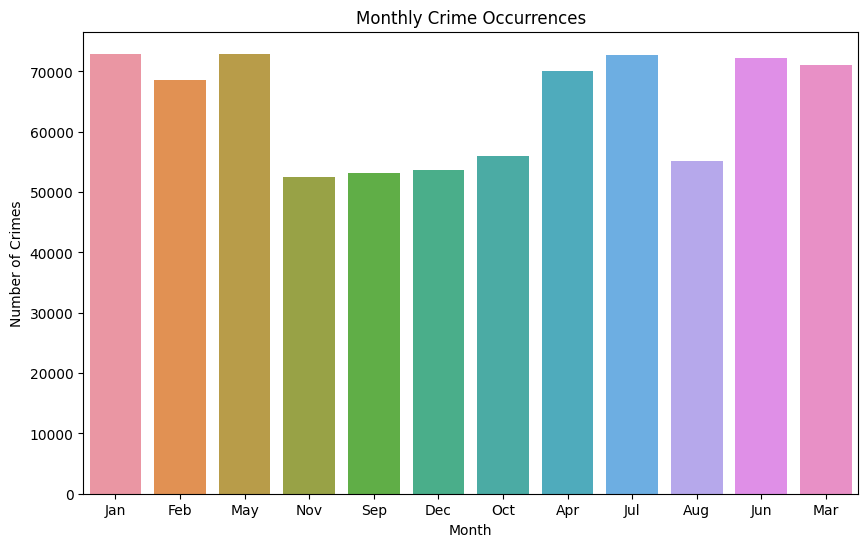

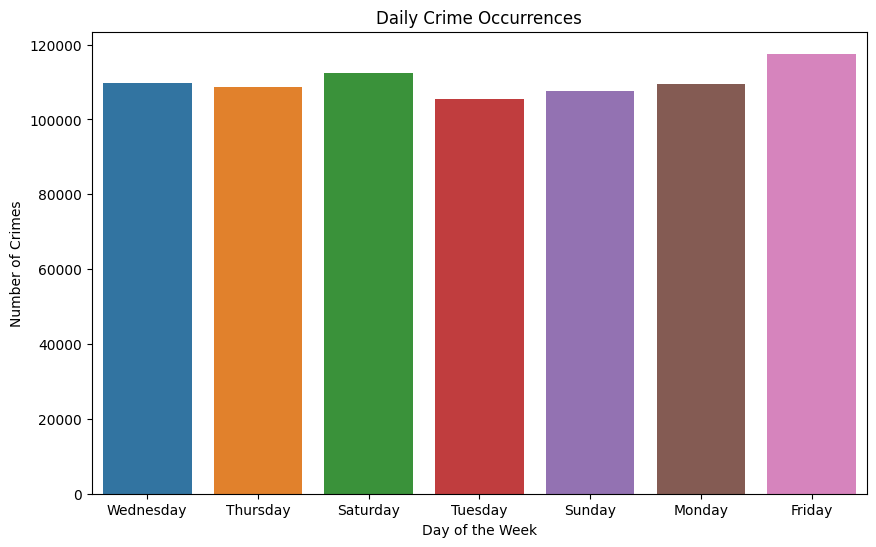

In [1469]:

# Plot crime occurrences by month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data= df)
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Monthly Crime Occurrences')
plt.show()


# Plot crime occurrences by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_week', data= df)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.title('Daily Crime Occurrences')
plt.show()


In [1470]:
# df.Date_Occurred.head(10)

In [1471]:
df.head(10)

,Time_Occurred,Area,Area_Name,Report_District_Number,Part_Type,Crime_Description,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Time_Quarter,Month
0,22:30,3,Southwest,377,2,BATTERY - SIMPLE ASSAULT,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0,Wednesday,Evening,Jan
1,03:30,1,Central,163,2,BATTERY - SIMPLE ASSAULT,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,624.0,Wednesday,Morning,Jan
2,12:00,1,Central,155,2,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,X,POLICE FACILITY,NaN,845.0,Thursday,Evening,Feb
3,17:30,15,N Hollywood,1543,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,745.0,Wednesday,Evening,Jan
4,04:15,19,Mission,1998,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",X,BEAUTY SUPPLY STORE,NaN,740.0,Wednesday,Morning,Jan
5,03:00,1,Central,163,1,"RAPE, FORCIBLE",H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,121.0,Wednesday,Morning,Jan
6,13:15,1,Central,161,1,SHOPLIFTING - PETTY THEFT ($950 & UNDER),H,DEPARTMENT STORE,NaN,442.0,Thursday,Evening,Jan
7,04:00,1,Central,155,2,OTHER MISCELLANEOUS CRIME,X,POLICE FACILITY,NaN,946.0,Saturday,Morning,Jan
8,20:00,1,Central,101,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,341.0,Saturday,Evening,Jan
9,19:25,17,Devonshire,1708,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",X,OTHER BUSINESS,NaN,341.0,Tuesday,Evening,May


In [1472]:
df.Crime_Description.value_counts()

VEHICLE - STOLEN                                           82396
BATTERY - SIMPLE ASSAULT                                   61108
THEFT OF IDENTITY                                          49522
BURGLARY FROM VEHICLE                                      47450
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    47210
                                                           ...  
PICKPOCKET, ATTEMPT                                            3
GRAND THEFT / AUTO REPAIR                                      3
FAILURE TO DISPERSE                                            2
DISHONEST EMPLOYEE ATTEMPTED THEFT                             2
INCITING A RIOT                                                1
Name: Crime_Description, Length: 138, dtype: int64

In [1473]:
df.Weapon_Description.value_counts()

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    143872
UNKNOWN WEAPON/OTHER WEAPON                        27958
VERBAL THREAT                                      19672
HAND GUN                                           16645
SEMI-AUTOMATIC PISTOL                               6101
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          1
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: Weapon_Description, Length: 79, dtype: int64

In [1474]:
df.head(10)

,Time_Occurred,Area,Area_Name,Report_District_Number,Part_Type,Crime_Description,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Time_Quarter,Month
0,22:30,3,Southwest,377,2,BATTERY - SIMPLE ASSAULT,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0,Wednesday,Evening,Jan
1,03:30,1,Central,163,2,BATTERY - SIMPLE ASSAULT,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,624.0,Wednesday,Morning,Jan
2,12:00,1,Central,155,2,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,X,POLICE FACILITY,NaN,845.0,Thursday,Evening,Feb
3,17:30,15,N Hollywood,1543,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,745.0,Wednesday,Evening,Jan
4,04:15,19,Mission,1998,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",X,BEAUTY SUPPLY STORE,NaN,740.0,Wednesday,Morning,Jan
5,03:00,1,Central,163,1,"RAPE, FORCIBLE",H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,121.0,Wednesday,Morning,Jan
6,13:15,1,Central,161,1,SHOPLIFTING - PETTY THEFT ($950 & UNDER),H,DEPARTMENT STORE,NaN,442.0,Thursday,Evening,Jan
7,04:00,1,Central,155,2,OTHER MISCELLANEOUS CRIME,X,POLICE FACILITY,NaN,946.0,Saturday,Morning,Jan
8,20:00,1,Central,101,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,341.0,Saturday,Evening,Jan
9,19:25,17,Devonshire,1708,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",X,OTHER BUSINESS,NaN,341.0,Tuesday,Evening,May


In [1475]:
df.head()

,Time_Occurred,Area,Area_Name,Report_District_Number,Part_Type,Crime_Description,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Time_Quarter,Month
0,22:30,3,Southwest,377,2,BATTERY - SIMPLE ASSAULT,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0,Wednesday,Evening,Jan
1,03:30,1,Central,163,2,BATTERY - SIMPLE ASSAULT,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,624.0,Wednesday,Morning,Jan
2,12:00,1,Central,155,2,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,X,POLICE FACILITY,NaN,845.0,Thursday,Evening,Feb
3,17:30,15,N Hollywood,1543,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,745.0,Wednesday,Evening,Jan
4,04:15,19,Mission,1998,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",X,BEAUTY SUPPLY STORE,NaN,740.0,Wednesday,Morning,Jan


In [1476]:
df.Area.value_counts()

1     51734
12    48756
14    45097
3     42996
6     41066
18    39480
20    39024
13    38409
15    38326
7     36469
2     35766
8     35433
11    33290
9     32756
10    32240
5     31962
17    31241
21    31230
19    30694
4     28947
16    25871
Name: Area, dtype: int64

In [1477]:
df.Area_Name.value_counts()

Central        51734
77th Street    48756
Pacific        45097
Southwest      42996
Hollywood      41066
Southeast      39480
Olympic        39024
Newton         38409
N Hollywood    38326
Wilshire       36469
Rampart        35766
West LA        35433
Northeast      33290
Van Nuys       32756
West Valley    32240
Harbor         31962
Devonshire     31241
Topanga        31230
Mission        30694
Hollenbeck     28947
Foothill       25871
Name: Area_Name, dtype: int64

<Axes: title={'center': 'Area names'}>

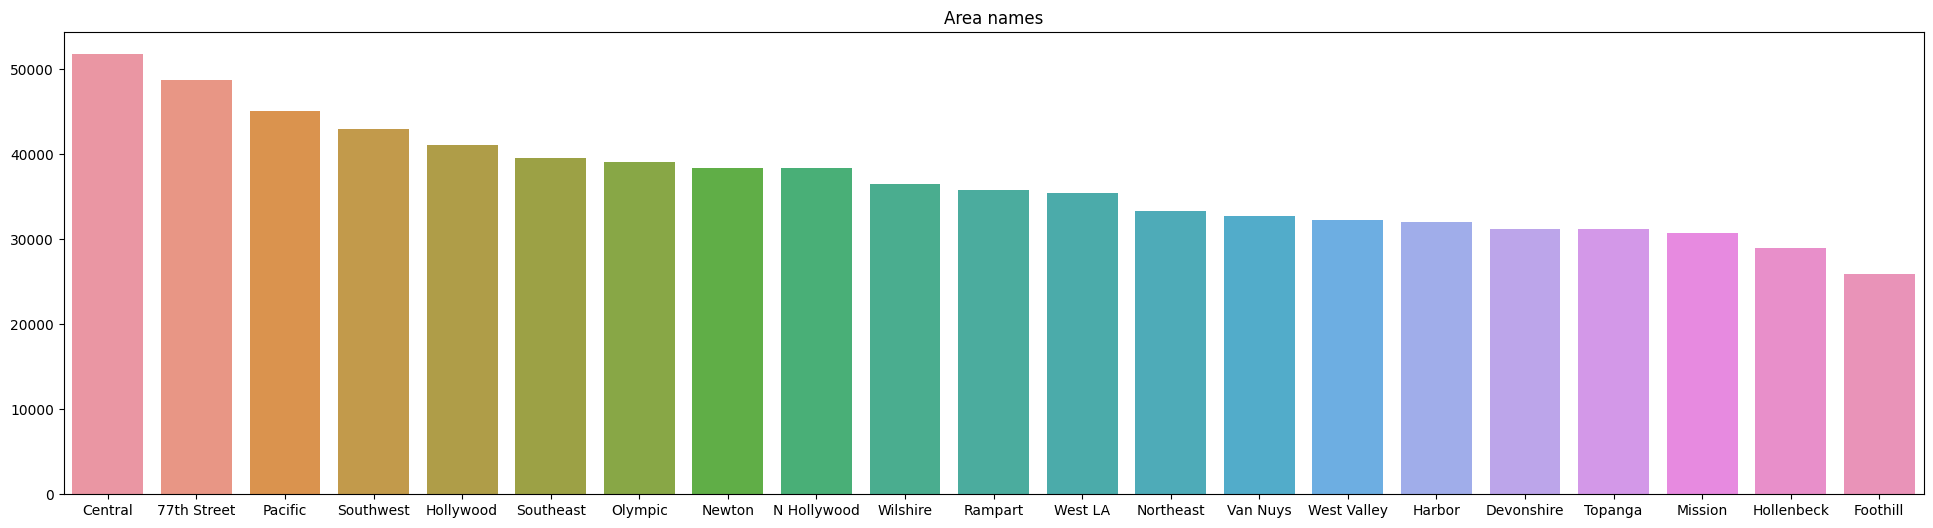

In [1478]:
bn = df.Area_Name.value_counts()
plt.figure(figsize=(24, 6))
plt.title('Area names')
sns.barplot(x=bn.index, y=bn.values)

In [1479]:
df.Report_District_Number.value_counts()   # remove 

162     4108
645     3887
182     3638
1494    3437
646     3367
        ... 
697        1
945        1
728        1
226        1
1046       1
Name: Report_District_Number, Length: 1199, dtype: int64

In [1480]:
df = df.drop('Report_District_Number', axis = 1)

In [1481]:
df.Part_Type.value_counts()

1    450833
2    319954
Name: Part_Type, dtype: int64

<Axes: title={'center': 'Part_Type'}>

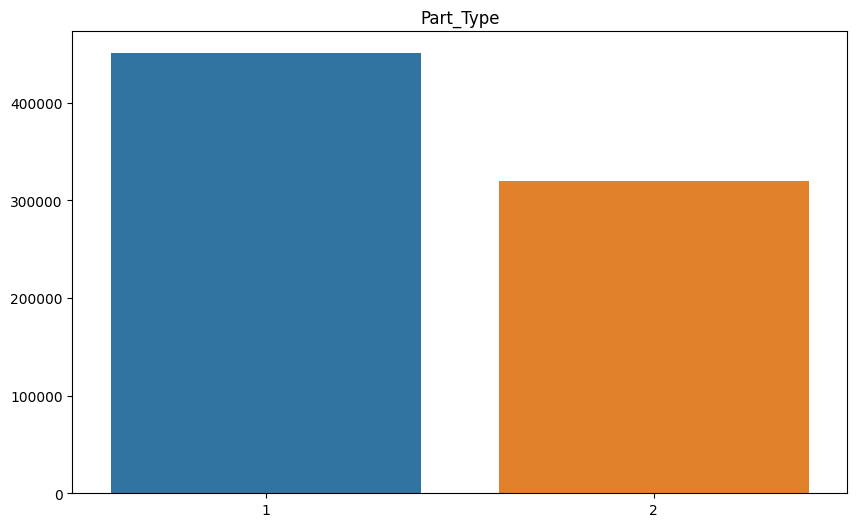

In [1482]:
bn=df.Part_Type.value_counts()
plt.figure(figsize=(10, 6))
plt.title('Part_Type')
sns.barplot(x=bn.index, y=bn.values)

### Dropping missing values

In [1483]:
round(df.isnull().sum()/len(df.index),2)


Time_Occurred           0.00
Area                    0.00
Area_Name               0.00
Part_Type               0.00
Crime_Description       0.00
Victim_Descent          0.13
Premises_Description    0.00
Weapon_Description      0.65
Crime_Code_1            0.00
Day_of_week             0.00
Time_Quarter            0.00
Month                   0.00
dtype: float64

In [1484]:
df.dropna(inplace = True)

In [1485]:
round(df.isnull().sum()/len(df.index),2)

Time_Occurred           0.0
Area                    0.0
Area_Name               0.0
Part_Type               0.0
Crime_Description       0.0
Victim_Descent          0.0
Premises_Description    0.0
Weapon_Description      0.0
Crime_Code_1            0.0
Day_of_week             0.0
Time_Quarter            0.0
Month                   0.0
dtype: float64

### Crime description 

In [1486]:
df.Crime_Description.value_counts()

BATTERY - SIMPLE ASSAULT                          61065
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    44273
INTIMATE PARTNER - SIMPLE ASSAULT                 38744
ROBBERY                                           26305
CRIMINAL THREATS - NO WEAPON DISPLAYED            15909
                                                  ...  
CREDIT CARDS, FRAUD USE ($950 & UNDER                 1
DRIVING WITHOUT OWNER CONSENT (DWOC)                  1
COUNTERFEIT                                           1
DRUNK ROLL                                            1
DISHONEST EMPLOYEE - PETTY THEFT                      1
Name: Crime_Description, Length: 118, dtype: int64

In [1487]:
df.Crime_Description.unique()

array(['BATTERY - SIMPLE ASSAULT', 'RAPE, FORCIBLE',
       'BURGLARY FROM VEHICLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'ARSON', 'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT PLAIN - PETTY ($950 & UNDER)', 'ROBBERY',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'BRANDISH WEAPON', 'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'THEFT, PERSON', 'BATTERY WITH SEXUAL CONTACT',
       'BATTERY POLICE (SIMPLE)', 'BURGLARY',
       'VIOLATION OF RESTRAINING ORDER', 'OTHER MISCELLANEOUS CRIME',
       'THROWING OBJECT AT MOVING VEHICLE',
       'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
       'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'ATTEMPTED ROBBERY', 'OTHER ASSAULT', 'BOMB SCARE',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'SEXUAL PENETRATION W/FOREIGN OBJECT',
       'SHOTS FIRED AT INHABITED DWELLING',
       'THEFT FROM MOTOR 

### Convert into genre

In [1488]:
# Create a mapping of crime types to genres
crime_genre_mapping = {
    'VEHICLE - STOLEN': 'Theft',
    'BATTERY - SIMPLE ASSAULT': 'Assault',
    'THEFT OF IDENTITY': 'Identity Theft',
    'BURGLARY FROM VEHICLE': 'Burglary',
    'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)': 'Vandalism',
    'BURGLARY': 'Burglary',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT': 'Assault',
    'THEFT PLAIN - PETTY ($950 & UNDER)': 'Theft',
    'INTIMATE PARTNER - SIMPLE ASSAULT': 'Assault',
    'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)': 'Theft',
    'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)': 'Theft',
    'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD': 'Theft',
    'VANDALISM - MISDEAMEANOR ($399 OR UNDER)': 'Vandalism',
    'THROWING OBJECT AT MOVING VEHICLE': 'Vandalism',
    'SHOPLIFTING - PETTY THEFT ($950 & UNDER)': 'Theft',
    'CRIMINAL THREATS - NO WEAPON DISPLAYED': 'Assault',
    'BRANDISH WEAPON': 'Assault',
    'TRESPASSING': 'Other',
    'INTIMATE PARTNER - AGGRAVATED ASSAULT': 'Assault',
    'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER': 'Assault',
    'VIOLATION OF RESTRAINING ORDER': 'Other',
    'BIKE - STOLEN': 'Theft',
    'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD': 'Other',
    'OTHER MISCELLANEOUS CRIME': 'Other',
    'VIOLATION OF COURT ORDER': 'Other',
    'BUNCO, GRAND THEFT': 'Theft',
    'ATTEMPTED ROBBERY': 'Theft',
    'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)': 'Theft',
    'THEFT, PERSON': 'Theft',
    'BATTERY WITH SEXUAL CONTACT': 'Assault',
    'BURGLARY, ATTEMPTED': 'Burglary',
    'BURGLARY FROM VEHICLE, ATTEMPTED': 'Burglary',
    'RAPE, FORCIBLE': 'Sexual Assault',
    'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)': 'Theft',
    'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT': 'Assault',
    'DOCUMENT FORGERY / STOLEN FELONY': 'Forgery',
    'VEHICLE - ATTEMPT STOLEN': 'Theft',
    'CONTEMPT OF COURT': 'Other',
    'DISCHARGE FIREARMS/SHOTS FIRED': 'Firearms',
    'ARSON': 'Arson',
    'BATTERY POLICE (SIMPLE)': 'Assault',
    'PICKPOCKET': 'Theft',
    'BUNCO, PETTY THEFT': 'Theft',
    'EXTORTION': 'Assault',
    'SHOTS FIRED AT INHABITED DWELLING': 'Firearms',
    'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)': 'Theft',
    'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)': 'Assault',
    'CRIMINAL HOMICIDE': 'Homicide',
    'MANSLAUGHTER, NEGLIGENT': 'Homicide',
    'DISTURBING THE PEACE': 'Other',
    'FAILURE TO YIELD': 'Other',
    'SEXUAL PENETRATION W/FOREIGN OBJECT': 'Sexual Assault',
    'DISTURBING THE PEACE' : 'Other',
    'OTHER MISCELLANEOUS CRIME': 'Other',
    'TRESPASSING': 'Other',
    'OTHER ASSAULT': 'Assault',
    'CONTEMPT OF COURT': 'Other',
    'VEHICLE - STOLEN': 'Theft',
    'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD': 'Theft',
    'THEFT PLAIN - PETTY ($950 & UNDER)': 'Theft',
    'THEFT OF IDENTITY': 'Theft',
    'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)': 'Theft',
    'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)': 'Theft',
    'THEFT FROM MOTOR VEHICLE - ATTEMPT': 'Theft',
    'THEFT PLAIN - ATTEMPT': 'Theft',
    'THEFT, PERSON': 'Theft',
    'BUNCO, PETTY THEFT': 'Theft',
    'PURSE SNATCHING': 'Theft',
    'THEFT FROM PERSON - ATTEMPT': 'Theft',
    'THEFT, COIN MACHINE - PETTY ($950 & UNDER)': 'Theft',
    'THEFT, COIN MACHINE - ATTEMPT': 'Theft',
    'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)': 'Theft',
    'THEFT FROM VEHICLE - ATTEMPT': 'Theft',
    'ROBBERY': 'Theft',
    'RAPE, ATTEMPTED': 'Sexual Assault',
    'INDECENT EXPOSURE': 'Sexual Assault',
    'INDECENT EXPOSURE': 'Sexual Assault',
    'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE': 'Sexual Assault',
    'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS': 'Sexual Assault',
    'SEX, UNLAWFUL (INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ)': 'Sexual Assault',
    'ORAL COPULATION': 'Sexual Assault',
    'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH': 'Sexual Assault',
    'CHILD PORNOGRAPHY': 'Sexual Assault',
    'LEWD/LASCIVIOUS ACTS WITH CHILD': 'Sexual Assault',
    'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)': 'Sexual Assault',
    'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT': 'Theft',
    'CHILD NEGLECT (SEE 300 W.I.C.)': 'Other',
    'CHILD ANNOYING (17YRS & UNDER)': 'Other',
    'RESISTING ARREST': 'Other',
    'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE': 'Other',
    'VIOLATION OF TEMPORARY RESTRAINING ORDER': 'Other',
    'KIDNAPPING': 'Other',
    'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS': 'Other',
    'CHILD STEALING': 'Other',
    'BOMB SCARE': 'Other',
    'PEEPING TOM': 'Other',
    'FALSE IMPRISONMENT': 'Other',
    'DRIVING WITHOUT OWNER CONSENT (DWOC)': 'Other',
    'FALSE POLICE REPORT': 'Other',
    'PIMPING': 'Other',
    'KIDNAPPING - GRAND ATTEMPT': 'Other',
    'PROWLER': 'Other',
    'DISRUPT SCHOOL': 'Other',
    'FAILURE TO DISPERSE': 'Other',
    'INCITING A RIOT': 'Other',
    'UNAUTHORIZED COMPUTER ACCESS': 'Identity Theft',
    'CREDIT CARDS, FRAUD USE ($950.01 & OVER)': 'Identity Theft',
    'CREDIT CARDS, FRAUD USE ($950 & UNDER)': 'Identity Theft',
    'DOCUMENT WORTHLESS ($200.01 & OVER)': 'Identity Theft',
    'WEAPONS POSSESSION/BOMBING': 'Firearms',
    'FIREARMS RESTRAINING ORDER (FIREARMS RO)': 'Firearms',
    'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)': 'Firearms',
    'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT' : 'Firearms',
    'ILLEGAL DUMPING' : 'Arson',
    'COUNTERFEIT' : 'Forgery'


    
}

# Apply the mapping to create a new 'Crime_Genre' column
df['Crime_Genre'] = df['Crime_Description'].map(crime_genre_mapping)

df = df.drop('Crime_Description', axis = 1)


In [1489]:
df.Crime_Genre.value_counts()

Assault           197117
Theft              34991
Burglary            8759
Vandalism           7723
Sexual Assault      5561
Other               5190
Firearms            4093
Homicide            1318
Arson                641
Forgery               10
Identity Theft         5
Name: Crime_Genre, dtype: int64

In [1490]:

# Replace 'Theft' and 'Identity Theft' with 'Total Theft' in the 'Crime_Genre' column
df['Crime_Genre'] = df['Crime_Genre'].replace(['Theft', 'Identity Theft'], 'Total Theft')
df['Crime_Genre'].value_counts()


Assault           197117
Total Theft        34996
Burglary            8759
Vandalism           7723
Sexual Assault      5561
Other               5190
Firearms            4093
Homicide            1318
Arson                641
Forgery               10
Name: Crime_Genre, dtype: int64

In [1491]:
df.Crime_Genre.isnull().sum()

2264

<Axes: title={'center': 'Crime Genre'}>

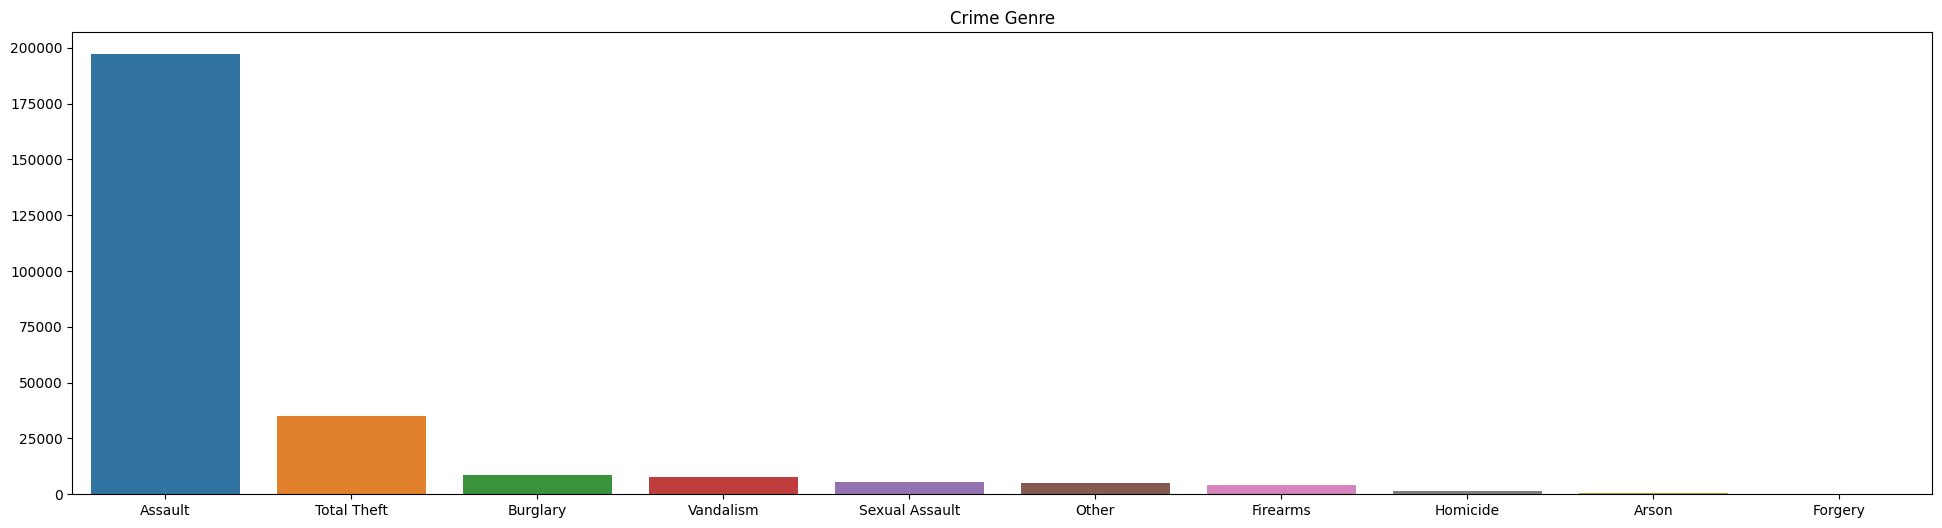

In [1492]:
bn=df.Crime_Genre.value_counts()
plt.figure(figsize=(24, 6))
plt.title('Crime Genre')
sns.barplot(x=bn.index, y=bn.values)

In [1493]:
others_Crime = {
    'Firearms' : 'Other',
    'Homicide' : 'Other',
    'Arson' : 'Other',
    'Forgery' : 'Other'
}
df['Crime_Genre'] = df['Crime_Genre'].replace(others_Crime)

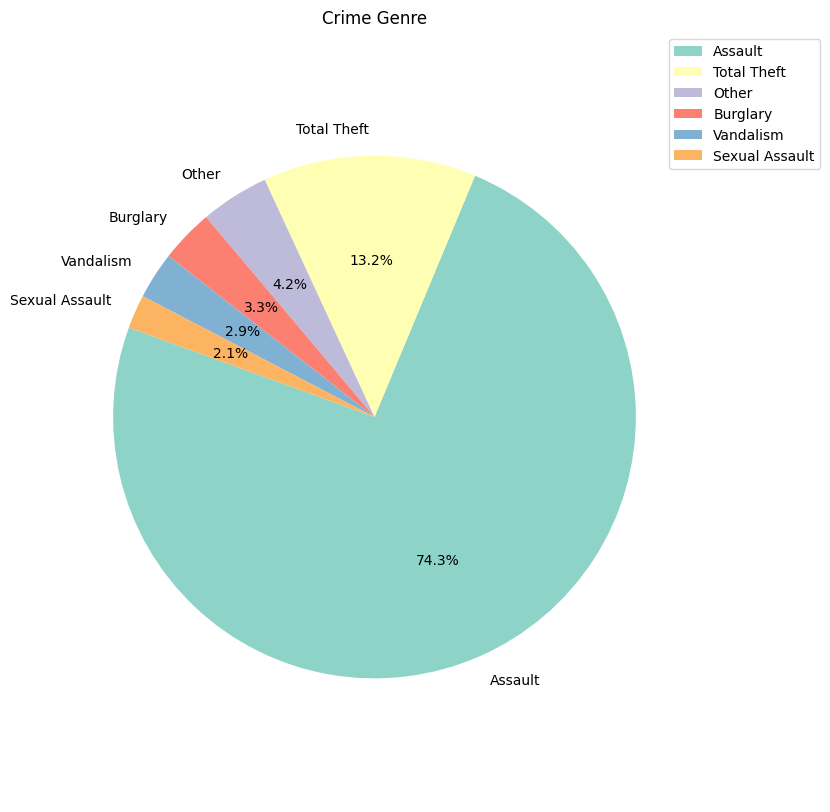

In [1494]:
bn=df.Crime_Genre.value_counts()
plt.figure(figsize=(10, 10))
plt.pie(bn.values, labels=bn.index, autopct='%1.1f%%', startangle=160, colors=sns.color_palette('Set3'), radius=0.8)
plt.title('Crime Genre', fontsize=12)
plt.axis('equal')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.subplots_adjust(right=0.7)
plt.show()

In [1495]:
df.head(10)

,Time_Occurred,Area,Area_Name,Part_Type,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Time_Quarter,Month,Crime_Genre
0,22:30,3,Southwest,2,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0,Wednesday,Evening,Jan,Assault
1,03:30,1,Central,2,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,624.0,Wednesday,Morning,Jan,Assault
5,03:00,1,Central,1,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,121.0,Wednesday,Morning,Jan,Sexual Assault
10,22:00,1,Central,1,A,STREET,ROCK/THROWN OBJECT,330.0,Saturday,Evening,Jan,Burglary
11,09:55,1,Central,2,O,PARKING LOT,VERBAL THREAT,930.0,Sunday,Morning,Jan,Assault
13,16:38,1,Central,1,X,DEPARTMENT STORE,UNKNOWN WEAPON/OTHER WEAPON,648.0,Tuesday,Evening,Jan,Other
15,07:30,19,Mission,2,H,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",626.0,Monday,Morning,Nov,Assault
16,20:18,11,Northeast,2,H,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",626.0,Saturday,Evening,Nov,Assault
17,19:00,5,Harbor,1,W,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",440.0,Saturday,Evening,Feb,Total Theft
19,13:30,1,Central,1,B,ALLEY,FOLDING KNIFE,210.0,Tuesday,Evening,Jan,Total Theft


### Victim Descent


In [1496]:
df.Victim_Descent.value_counts() 

H    123509
B     58071
W     44226
O     18167
X     17358
A      5593
K       380
F       147
I        66
C        39
J        25
V        22
G        18
P        16
U        15
Z         9
S         7
D         2
L         2
Name: Victim_Descent, dtype: int64

In [1497]:
# Remove the row with '-' value from the DataFrame
df = df[df['Victim_Descent'] != '-']

# Display the updated value counts after removing the '-' row
print(df['Victim_Descent'].value_counts())

H    123509
B     58071
W     44226
O     18167
X     17358
A      5593
K       380
F       147
I        66
C        39
J        25
V        22
G        18
P        16
U        15
Z         9
S         7
D         2
L         2
Name: Victim_Descent, dtype: int64


In [1498]:
df.Victim_Descent.isnull().sum()

0

In [1499]:
# Create a mapping of original values to new labels
victim_descent_mapping = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}

# Replace the values in the 'Victim_Descent' column using the mapping
df['Victim_Descent'] = df['Victim_Descent'].map(victim_descent_mapping)

# Display the value counts after the mapping
print(df['Victim_Descent'].value_counts())

Hispanic/Latin/Mexican            123509
Black                              58071
White                              44226
Other                              18167
Unknown                            17358
Other Asian                         5593
Korean                               380
Filipino                             147
American Indian/Alaskan Native        66
Chinese                               39
Japanese                              25
Vietnamese                            22
Guamanian                             18
Pacific Islander                      16
Hawaiian                              15
Asian Indian                           9
Samoan                                 7
Cambodian                              2
Laotian                                2
Name: Victim_Descent, dtype: int64


In [1500]:
# Create a mapping to combine specified categories into 'Asian'
asian_mapping = {
    'Other Asian': 'Asian',
    'Asian Indian': 'Asian',
    'Korean': 'Asian',
    'Filipino': 'Asian',
    'Chinese': 'Asian',
    'Japanese': 'Asian',
    'Vietnamese': 'Asian',
    'Cambodian': 'Asian',
    'Laotian': 'Asian'
}

# Apply the mapping to create a new 'Victim_Descent' column with combined categories
df['Victim_Descent'] = df['Victim_Descent'].replace(asian_mapping)

# Display the updated value counts for the new combined category
print(df['Victim_Descent'].value_counts())


Hispanic/Latin/Mexican            123509
Black                              58071
White                              44226
Other                              18167
Unknown                            17358
Asian                               6219
American Indian/Alaskan Native        66
Guamanian                             18
Pacific Islander                      16
Hawaiian                              15
Samoan                                 7
Name: Victim_Descent, dtype: int64


In [1501]:
# Create a mapping to combine specified categories into 'Other_Victim_Descent'
other_mapping = {
    'Other': 'Other_Victim_Descent',
    'American Indian/Alaskan Native': 'Other_Victim_Descent',
    'Guamanian': 'Other_Victim_Descent',
    'Pacific Islander': 'Other_Victim_Descent',
    'Hawaiian': 'Other_Victim_Descent',
    'Samoan': 'Other_Victim_Descent'
}

# Apply the mapping to create a new 'Victim_Descent' column with combined categories
df['Victim_Descent_Combined'] = df['Victim_Descent'].replace(other_mapping)

# Display the updated value counts for the new combined category
print(df['Victim_Descent_Combined'].value_counts())


Hispanic/Latin/Mexican    123509
Black                      58071
White                      44226
Other_Victim_Descent       18289
Unknown                    17358
Asian                       6219
Name: Victim_Descent_Combined, dtype: int64


<Axes: >

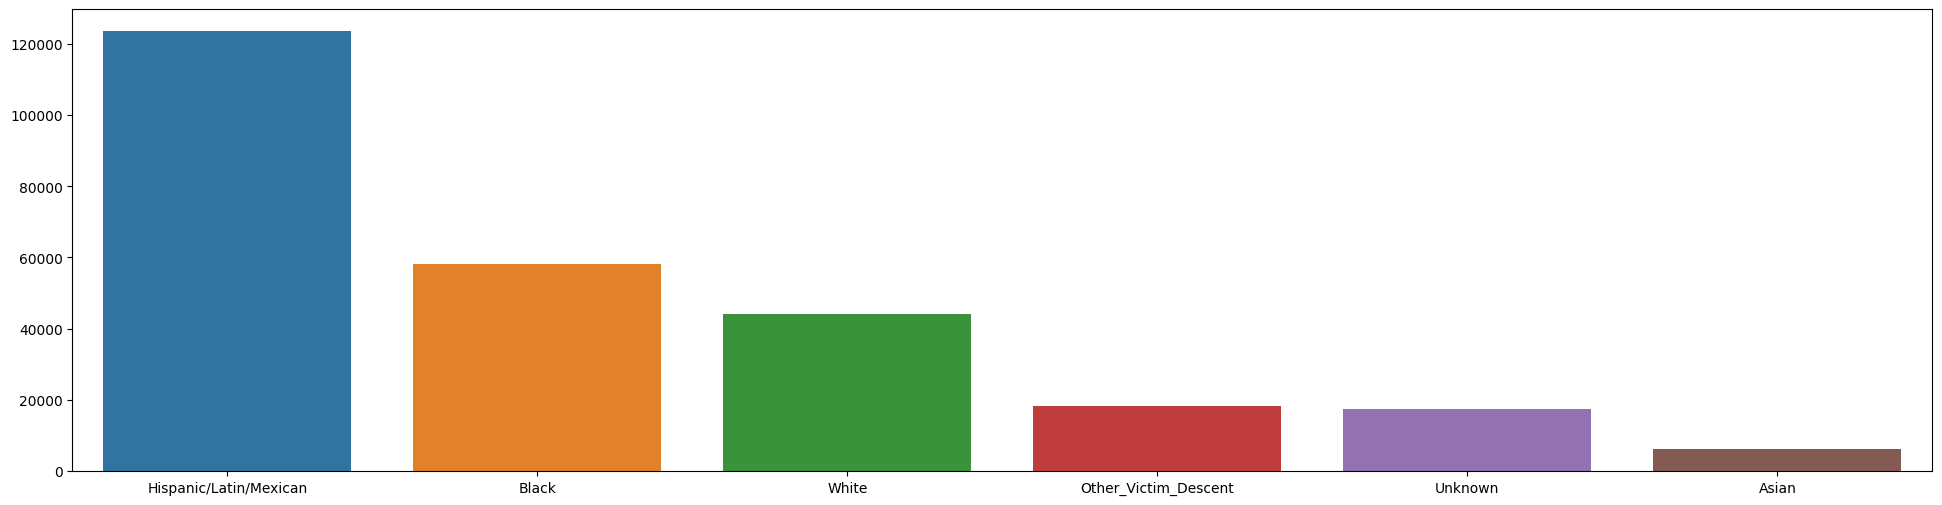

In [1502]:
bn = df.Victim_Descent_Combined.value_counts()
plt.figure(figsize=(24, 6))
sns.barplot(x=bn.index, y=bn.values)

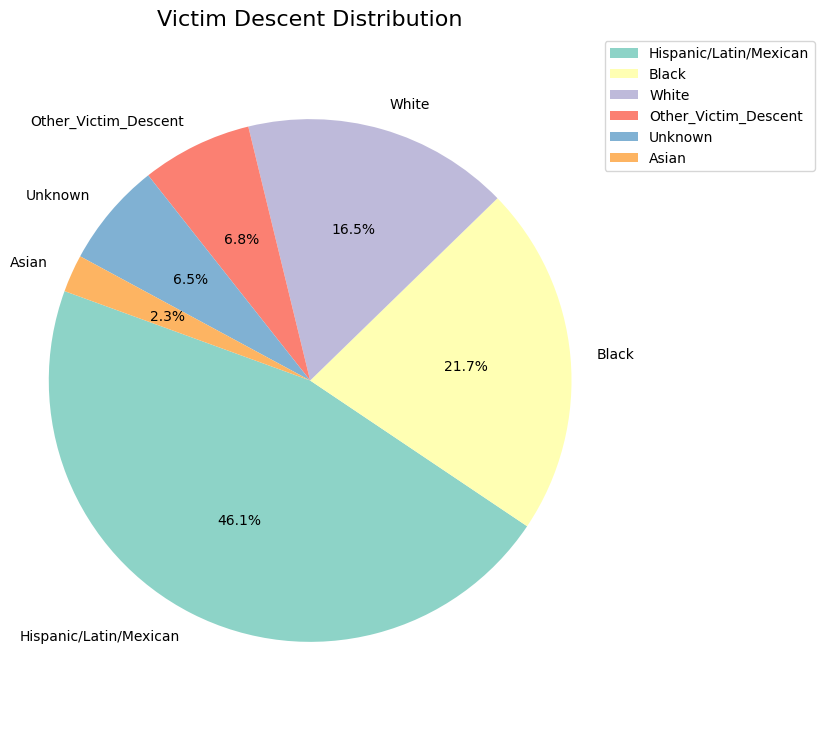

In [1503]:
bn = df['Victim_Descent_Combined'].value_counts()
plt.figure(figsize=(10, 9))
threshold_percentage = 2.0
labels_to_display = [label if count / bn.sum() * 100 >= threshold_percentage else '' for label, count in bn.items()]
explode = [0.1 if count / bn.sum() * 100 < threshold_percentage else 0 for count in bn]
plt.pie(bn.values, labels=labels_to_display, autopct='%1.1f%%', startangle=160, colors=sns.color_palette('Set3'), radius=0.9, explode=explode)
plt.title('Victim Descent Distribution', fontsize=16)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.subplots_adjust(right=0.7)
plt.axis('equal')
plt.show()

In [1504]:
df = df.drop('Victim_Descent', axis = 1)

### Premises Description


In [1505]:
df.Premises_Description.value_counts()

STREET                                          56813
SINGLE FAMILY DWELLING                          49128
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    45221
SIDEWALK                                        26515
PARKING LOT                                     15001
                                                ...  
ENERGY PLANT/FACILITY                               1
SURPLUS SURVIVAL STORE                              1
MTA - SILVER LINE - 37TH ST/USC                     1
MTA - SILVER LINE - DOWNTOWN STREET STOPS           1
VIDEO RENTAL STORE                                  1
Name: Premises_Description, Length: 298, dtype: int64

In [1506]:
df.Premises_Description.isnull().sum()

0

In [1507]:
df.Premises_Description.unique()

array(['SINGLE FAMILY DWELLING', 'SIDEWALK',
       'NIGHT CLUB (OPEN EVENINGS ONLY)', 'STREET', 'PARKING LOT',
       'DEPARTMENT STORE', 'ALLEY',
       'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
       'PUBLIC RESTROOM/OUTSIDE*', 'HOTEL', 'MTA BUS',
       'NURSING/CONVALESCENT/RETIREMENT HOME', 'MINI-MART',
       'OTHER BUSINESS', 'GROUP HOME', 'MTA - RED LINE - UNION STATION',
       'MTA - RED LINE - PERSHING SQUARE', 'RESTAURANT/FAST FOOD',
       'DRUG STORE', 'MOTEL', 'HOSPITAL',
       'LA UNION STATION (NOT LINE SPECIFIC)', 'DETENTION/JAIL FACILITY',
       'OTHER PREMISE', 'MTA - BLUE LINE - 7TH AND METRO CENTER',
       'PARKING UNDERGROUND/BUILDING', 'STAPLES CENTER *',
       'CONSTRUCTION SITE', 'MTA - RED LINE - 7TH AND METRO CENTER',
       'LIQUOR STORE', 'MTA - PURPLE LINE - PERSHING SQUARE',
       'OTHER STORE', 'MISSIONS/SHELTERS',
       "SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS",
       "SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S CLUB",
       'MT

In [1508]:
private_areas = [
    "OTHER BUSINESS",
    "VEHICLE, PASSENGER/TRUCK",
    "GARAGE/CARPORT",
    "DRIVEWAY",
    "RESTAURANT/FAST FOOD",
    "DEPARTMENT STORE",
    "PARKING UNDERGROUND/BUILDING",
    "MARKET",
    "GAS STATION",
    "OTHER STORE",
    "CLOTHING STORE",
    "DRUG STORE",
    "MINI-MART",
    "PUBLIC STORAGE",
    "TRANSPORTATION FACILITY (AIRPORT)",
    "OFFICE BUILDING/OFFICE",
    "CONDOMINIUM/TOWNHOUSE",
    "MOTEL",
    "HOSPITAL",
    "ELEMENTARY SCHOOL",
    "JUNIOR HIGH SCHOOL",
    "CHURCH/CHAPEL (CHANGED 03-03 FROM CHURCH/TEMPLE)",
    "CELL PHONE STORE",
    "WAREHOUSE",
    "CONSTRUCTION SITE",
    "DIY CENTER (LOWE'S, HOME DEPOT, OSH, CONTRACTORS WAREHOUSE)",
    "COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, ETC.)",
    "DISCOUNT STORE (99 CENT, DOLLAR, ETC.)", 
    "NIGHT CLUB (OPEN EVENINGS ONLY)",
    "AUTOMATED TELLER MACHINE (ATM)",
    "LIQUOR STORE",
    "MTA BUS",
    "BAR/COCKTAIL/NIGHTCLUB",
    "SHOPPING MALL (COMMON AREA)",
    "AUTO REPAIR SHOP",
    "BANK"
]
residential_property = [
    "SINGLE FAMILY DWELLING",
    "MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",
    "HOTEL",
    "OTHER RESIDENCE",
    "YARD (RESIDENTIAL/BUSINESS)",
    "PORCH, RESIDENTIAL",
    "HEALTH SPA/GYM"
]

public_property = [
    "STREET",
    "PARKING LOT",
    "SIDEWALK",
    "ALLEY",
    "PARK/PLAYGROUND",
    "LAUNDROMAT",
    "GOVERNMENT FACILITY (FEDERAL, STATE, COUNTY & CITY)",
    "BEACH",
    "LA UNION STATION (NOT LINE SPECIFIC)",
    "BUS STOP",
    "POLICE FACILITY"
]


def classify_place(description):
    if description in private_areas:
        return "private"
    elif description in public_property:
        return "public"
    elif description in residential_property:
        return "public"
    else:
        return "unknown"
    
df['Premises_Description'] = df['Premises_Description'].apply(classify_place)


In [1509]:
df.Premises_Description.value_counts()

public     207359
private     43851
unknown     16462
Name: Premises_Description, dtype: int64

In [1510]:
# Removing the row with 'unknown' value
df= df[df['Premises_Description'] != 'unknown']
df.Premises_Description.value_counts()



public     207359
private     43851
Name: Premises_Description, dtype: int64

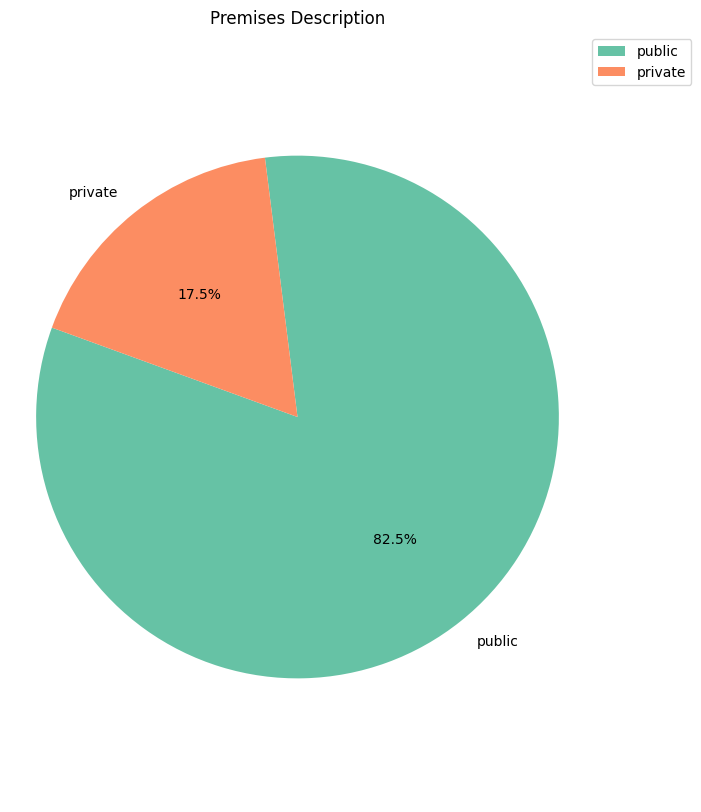

In [1511]:
bn=df.Premises_Description.value_counts()
plt.figure(figsize=(10, 10))
plt.pie(bn.values, labels=bn.index, autopct='%1.1f%%', startangle=160, colors=sns.color_palette('Set2'), radius=0.8)
plt.title('Premises Description', fontsize=12)
plt.axis('equal')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.subplots_adjust(right=0.7)
plt.show()

### Weapon Description

In [1512]:
df.Weapon_Description.value_counts()

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    134359
UNKNOWN WEAPON/OTHER WEAPON                        26011
VERBAL THREAT                                      18311
HAND GUN                                           16041
SEMI-AUTOMATIC PISTOL                               5868
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          1
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: Weapon_Description, Length: 79, dtype: int64

In [1513]:
df.Weapon_Description.isnull().sum()

0

In [1514]:
df.Weapon_Description.unique()

array(['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
       'UNKNOWN WEAPON/OTHER WEAPON', 'ROCK/THROWN OBJECT',
       'VERBAL THREAT', 'FOLDING KNIFE', 'BLUNT INSTRUMENT', 'BOTTLE',
       'SEMI-AUTOMATIC PISTOL', 'CLUB/BAT', 'OTHER CUTTING INSTRUMENT',
       'HAND GUN', 'PHYSICAL PRESENCE', 'VEHICLE', 'SCISSORS', 'STICK',
       'MACHETE', 'OTHER KNIFE', 'SHOTGUN', 'ICE PICK',
       'KNIFE WITH BLADE 6INCHES OR LESS', 'FIRE', 'GLASS',
       'SIMULATED GUN', 'DEMAND NOTE',
       'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH', 'BOMB THREAT',
       'PIPE/METAL PIPE', 'UNKNOWN FIREARM', 'MACE/PEPPER SPRAY',
       'HAMMER', 'RAZOR', 'OTHER FIREARM',
       'BELT FLAILING INSTRUMENT/CHAIN',
       'UNKNOWN TYPE CUTTING INSTRUMENT', 'SCREWDRIVER', 'KITCHEN KNIFE',
       'AIR PISTOL/REVOLVER/RIFLE/BB GUN', 'BRASS KNUCKLES', 'REVOLVER',
       'SWITCH BLADE', 'STUN GUN', 'RIFLE', 'ASSAULT WEAPON/UZI/AK47/ETC',
       'ANTIQUE FIREARM', 'FIXED OBJECT', 'SEMI-AUTOMATIC RIFLE',
       'C

In [1515]:
categories = {
    'Physical Force': ['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'VERBAL THREAT', 'PHYSICAL PRESENCE'],
    'Edged Weapon': ['FOLDING KNIFE', 'OTHER CUTTING INSTRUMENT', 'HAND GUN', 'SCISSORS', 'MACHETE', 'OTHER KNIFE', 'ICE PICK', 'KNIFE WITH BLADE 6INCHES OR LESS', 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH', 'RAZOR', 'UNKNOWN TYPE CUTTING INSTRUMENT', 'KITCHEN KNIFE', 'DIRK/DAGGER', 'BOWIE KNIFE', 'STRAIGHT RAZOR'],
    'Blunt Weapon': ['BLUNT INSTRUMENT', 'BOTTLE', 'CLUB/BAT', 'STICK', 'PIPE/METAL PIPE', 'BELT FLAILING INSTRUMENT/CHAIN', 'HAMMER', 'CONCRETE BLOCK/BRICK', 'BOARD', 'MARTIAL ARTS WEAPONS', 'ROPE/LIGATURE'],
    'Firearm': ['SEMI-AUTOMATIC PISTOL', 'SEMI-AUTOMATIC RIFLE', 'REVOLVER', 'SWITCH BLADE', 'STUN GUN', 'ASSAULT WEAPON/UZI/AK47/ETC', 'ANTIQUE FIREARM', 'OTHER FIREARM', 'UNKNOWN FIREARM', 'RIFLE', 'MAC-11 SEMIAUTOMATIC ASSAULT WEAPON', 'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE', 'SAWED OFF RIFLE/SHOTGUN', 'EXPLOXIVE DEVICE', 'HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE', 'UZI SEMIAUTOMATIC ASSAULT RIFLE', 'UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE', 'M-14 SEMIAUTOMATIC ASSAULT RIFLE'],
    'Vehicle': ['VEHICLE'],
    'Unknown/Other': ['UNKNOWN WEAPON/OTHER WEAPON', 'ROCK/THROWN OBJECT', 'FIRE', 'GLASS', 'SIMULATED GUN', 'DEMAND NOTE', 'BOMB THREAT', 'SCREWDRIVER', 'AIR PISTOL/REVOLVER/RIFLE/BB GUN', 'BRASS KNUCKLES', 'AXE', 'CAUSTIC CHEMICAL/POISON', 'TIRE IRON', 'SYRINGE', 'SCALDING LIQUID', 'RAZOR BLADE', 'CLEAVER', 'BOW AND ARROW', 'AUTOMATIC WEAPON/SUB-MACHINE GUN', 'LIQUOR/DRUGS', 'SWORD', 'M1-1 SEMIAUTOMATIC ASSAULT RIFLE', 'STARTER PISTOL/REVOLVER', 'MAC-10 SEMIAUTOMATIC ASSAULT WEAPON', 'TOY GUN', 'BLACKJACK', 'RELIC FIREARM']
}

df['Weapon_Description'] = df['Weapon_Description'].apply(lambda x: next((category for category, weapons in categories.items() if x in weapons), 'Unknown/Other'))


In [1516]:
df['Weapon_Description'].value_counts()

Physical Force    153373
Unknown/Other      36872
Edged Weapon       33396
Firearm            14087
Blunt Weapon       10801
Vehicle             2681
Name: Weapon_Description, dtype: int64

In [1517]:
# Merge 'Physical Force', 'Unknown/Other', and 'Vehicle' into 'Non Weapon'
df['Weapon_Description'] = df['Weapon_Description'].replace(['Physical Force', 'Unknown/Other', 'Vehicle'], 'Non Weapon')
# Merge 'Edged Weapon', 'Firearm', and 'Blunt Weapon' into 'Weapon'
df['Weapon_Description'] = df['Weapon_Description'].replace(['Edged Weapon', 'Firearm', 'Blunt Weapon'], 'Weapon')

# Verify the changes
print(df['Weapon_Description'].value_counts())


Non Weapon    192926
Weapon         58284
Name: Weapon_Description, dtype: int64


<Axes: title={'center': 'Weapon Description'}>

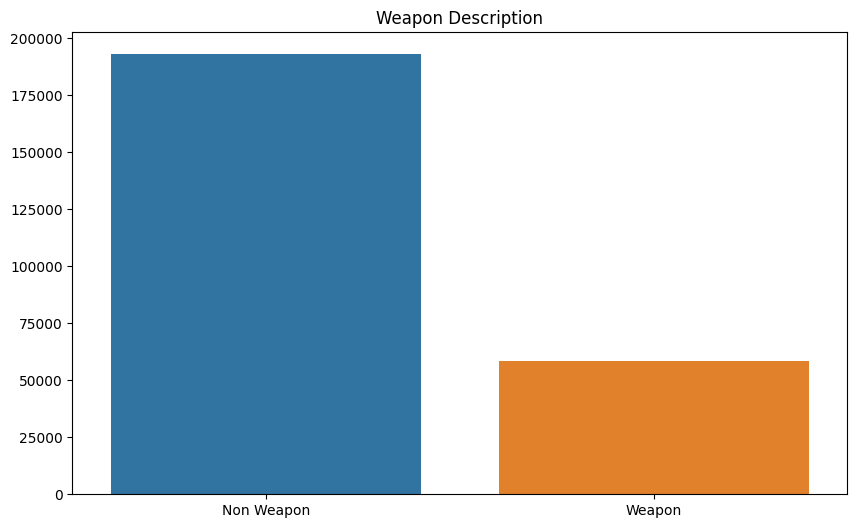

In [1518]:
bn=df.Weapon_Description.value_counts()
plt.figure(figsize=(10, 6))
plt.title('Weapon Description')

sns.barplot(x=bn.index, y=bn.values)

In [1519]:
df.head()

,Time_Occurred,Area,Area_Name,Part_Type,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Time_Quarter,Month,Crime_Genre,Victim_Descent_Combined
0,22:30,3,Southwest,2,public,Non Weapon,624.0,Wednesday,Evening,Jan,Assault,Black
1,03:30,1,Central,2,public,Non Weapon,624.0,Wednesday,Morning,Jan,Assault,Hispanic/Latin/Mexican
5,03:00,1,Central,1,private,Non Weapon,121.0,Wednesday,Morning,Jan,Sexual Assault,Hispanic/Latin/Mexican
10,22:00,1,Central,1,public,Non Weapon,330.0,Saturday,Evening,Jan,Burglary,Asian
11,09:55,1,Central,2,public,Non Weapon,930.0,Sunday,Morning,Jan,Assault,Other_Victim_Descent


In [1520]:
df.Premises_Description.value_counts()

public     207359
private     43851
Name: Premises_Description, dtype: int64

### Premises Description

In [1521]:
# # Map values
# df['Premises_Description'] = df['Premises_Description'].map({'public': 1, 'private': 0})

# # Update value counts of the modified column
# value_counts = df['Premises_Description'].value_counts()
# print(value_counts)




In [1522]:
df.head(10)

,Time_Occurred,Area,Area_Name,Part_Type,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Time_Quarter,Month,Crime_Genre,Victim_Descent_Combined
0,22:30,3,Southwest,2,public,Non Weapon,624.0,Wednesday,Evening,Jan,Assault,Black
1,03:30,1,Central,2,public,Non Weapon,624.0,Wednesday,Morning,Jan,Assault,Hispanic/Latin/Mexican
5,03:00,1,Central,1,private,Non Weapon,121.0,Wednesday,Morning,Jan,Sexual Assault,Hispanic/Latin/Mexican
10,22:00,1,Central,1,public,Non Weapon,330.0,Saturday,Evening,Jan,Burglary,Asian
11,09:55,1,Central,2,public,Non Weapon,930.0,Sunday,Morning,Jan,Assault,Other_Victim_Descent
13,16:38,1,Central,1,private,Non Weapon,648.0,Tuesday,Evening,Jan,Other,Unknown
15,07:30,19,Mission,2,public,Non Weapon,626.0,Monday,Morning,Nov,Assault,Hispanic/Latin/Mexican
16,20:18,11,Northeast,2,public,Non Weapon,626.0,Saturday,Evening,Nov,Assault,Hispanic/Latin/Mexican
17,19:00,5,Harbor,1,public,Non Weapon,440.0,Saturday,Evening,Feb,Total Theft,White
19,13:30,1,Central,1,public,Weapon,210.0,Tuesday,Evening,Jan,Total Theft,Black


In [1523]:
df.Weapon_Description.isnull().sum()

0

In [1524]:
df.head()

,Time_Occurred,Area,Area_Name,Part_Type,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Time_Quarter,Month,Crime_Genre,Victim_Descent_Combined
0,22:30,3,Southwest,2,public,Non Weapon,624.0,Wednesday,Evening,Jan,Assault,Black
1,03:30,1,Central,2,public,Non Weapon,624.0,Wednesday,Morning,Jan,Assault,Hispanic/Latin/Mexican
5,03:00,1,Central,1,private,Non Weapon,121.0,Wednesday,Morning,Jan,Sexual Assault,Hispanic/Latin/Mexican
10,22:00,1,Central,1,public,Non Weapon,330.0,Saturday,Evening,Jan,Burglary,Asian
11,09:55,1,Central,2,public,Non Weapon,930.0,Sunday,Morning,Jan,Assault,Other_Victim_Descent


In [1525]:
df.Crime_Code_1.value_counts()

624.0    55806
230.0    41983
626.0    38216
210.0    24668
930.0    14788
         ...  
840.0        1
880.0        1
475.0        1
670.0        1
444.0        1
Name: Crime_Code_1, Length: 117, dtype: int64

### Part type

In [1526]:
def year (x):
    if x == 1 : 
        return 'Serious'
    else:
        return 'Less-Serious'
df['Part_Type'] = df['Part_Type'].apply(year)
df

,Time_Occurred,Area,Area_Name,Part_Type,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Time_Quarter,Month,Crime_Genre,Victim_Descent_Combined
0,22:30,3,Southwest,Less-Serious,public,Non Weapon,624.0,Wednesday,Evening,Jan,Assault,Black
1,03:30,1,Central,Less-Serious,public,Non Weapon,624.0,Wednesday,Morning,Jan,Assault,Hispanic/Latin/Mexican
5,03:00,1,Central,Serious,private,Non Weapon,121.0,Wednesday,Morning,Jan,Sexual Assault,Hispanic/Latin/Mexican
10,22:00,1,Central,Serious,public,Non Weapon,330.0,Saturday,Evening,Jan,Burglary,Asian
11,09:55,1,Central,Less-Serious,public,Non Weapon,930.0,Sunday,Morning,Jan,Assault,Other_Victim_Descent
...,...,...,...,...,...,...,...,...,...,...,...,...
770770,18:30,4,Hollenbeck,Serious,public,Non Weapon,236.0,Thursday,Evening,Feb,Assault,Hispanic/Latin/Mexican
770773,20:00,17,Devonshire,Less-Serious,public,Non Weapon,626.0,Monday,Evening,May,Assault,Hispanic/Latin/Mexican
770774,14:00,6,Hollywood,Serious,public,Non Weapon,210.0,Monday,Evening,Jul,Total Theft,Black
770783,10:00,16,Foothill,Serious,public,Non Weapon,230.0,Wednesday,Morning,Mar,Assault,Hispanic/Latin/Mexican


In [1527]:
df.columns

Index(['Time_Occurred', 'Area', 'Area_Name', 'Part_Type',
       'Premises_Description', 'Weapon_Description', 'Crime_Code_1',
       'Day_of_week', 'Time_Quarter', 'Month', 'Crime_Genre',
       'Victim_Descent_Combined'],
      dtype='object')

In [1528]:
df.shape

(251210, 12)

### 

In [1529]:
a = len(df.index)/9240
print(a)

27.187229437229437


In [1530]:
# dropping the null values in the remaiaining columns as their number is very small 

df.dropna(inplace = True)

In [1531]:
round(df.isnull().sum()/len(df.index),2)

Time_Occurred              0.0
Area                       0.0
Area_Name                  0.0
Part_Type                  0.0
Premises_Description       0.0
Weapon_Description         0.0
Crime_Code_1               0.0
Day_of_week                0.0
Time_Quarter               0.0
Month                      0.0
Crime_Genre                0.0
Victim_Descent_Combined    0.0
dtype: float64

In [1532]:
df.Area_Name.value_counts()

77th Street    22815
Central        18293
Southeast      17970
Southwest      15356
Hollywood      15161
Newton         14996
Rampart        13939
Olympic        13243
Pacific        11065
Harbor         10438
Hollenbeck      9908
N Hollywood     9483
Mission         9380
West Valley     9288
Wilshire        9266
Van Nuys        8420
Topanga         8275
Northeast       8239
Foothill        8073
Devonshire      7808
West LA         7654
Name: Area_Name, dtype: int64

In [1533]:
df.head(10)

,Time_Occurred,Area,Area_Name,Part_Type,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Time_Quarter,Month,Crime_Genre,Victim_Descent_Combined
0,22:30,3,Southwest,Less-Serious,public,Non Weapon,624.0,Wednesday,Evening,Jan,Assault,Black
1,03:30,1,Central,Less-Serious,public,Non Weapon,624.0,Wednesday,Morning,Jan,Assault,Hispanic/Latin/Mexican
5,03:00,1,Central,Serious,private,Non Weapon,121.0,Wednesday,Morning,Jan,Sexual Assault,Hispanic/Latin/Mexican
10,22:00,1,Central,Serious,public,Non Weapon,330.0,Saturday,Evening,Jan,Burglary,Asian
11,09:55,1,Central,Less-Serious,public,Non Weapon,930.0,Sunday,Morning,Jan,Assault,Other_Victim_Descent
13,16:38,1,Central,Serious,private,Non Weapon,648.0,Tuesday,Evening,Jan,Other,Unknown
15,07:30,19,Mission,Less-Serious,public,Non Weapon,626.0,Monday,Morning,Nov,Assault,Hispanic/Latin/Mexican
16,20:18,11,Northeast,Less-Serious,public,Non Weapon,626.0,Saturday,Evening,Nov,Assault,Hispanic/Latin/Mexican
17,19:00,5,Harbor,Serious,public,Non Weapon,440.0,Saturday,Evening,Feb,Total Theft,White
19,13:30,1,Central,Serious,public,Weapon,210.0,Tuesday,Evening,Jan,Total Theft,Black


In [1534]:
df.shape

(249070, 12)

In [1535]:
# df.Weapon_Description.value_counts()

In [1536]:
df.Crime_Genre.value_counts()

Assault           185202
Total Theft        32752
Other              10593
Burglary            8150
Vandalism           7300
Sexual Assault      5073
Name: Crime_Genre, dtype: int64

### Area Name dummy variable

In [1537]:
Area_Name_dummy = pd.get_dummies(df.Area_Name, drop_first= True)
Area_Name_dummy = Area_Name_dummy.astype(int)
Area_Name_dummy

,Central,Devonshire,Foothill,Harbor,Hollenbeck,Hollywood,Mission,N Hollywood,Newton,Northeast,Olympic,Pacific,Rampart,Southeast,Southwest,Topanga,Van Nuys,West LA,West Valley,Wilshire
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770770,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
770773,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
770774,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
770783,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Part Type dummy variables

In [1538]:
Part_Type_dummy = pd.get_dummies(df.Part_Type, drop_first= True)
Part_Type_dummy = Part_Type_dummy.astype(int)
Part_Type_dummy

,Serious
0,0
1,0
5,1
10,1
11,0
...,...
770770,1
770773,0
770774,1
770783,1


### Premises Description dummy variables

In [1539]:
Weapon_Description_dummy = pd.get_dummies(df.Weapon_Description, drop_first= True)
Weapon_Description_dummy  = Weapon_Description_dummy.astype(int)
Weapon_Description_dummy 

,Weapon
0,0
1,0
5,0
10,0
11,0
...,...
770770,0
770773,0
770774,0
770783,0


In [1540]:
Premises_Description_dummy = pd.get_dummies(df.Premises_Description, drop_first= True)
Premises_Description_dummy  = Premises_Description_dummy.astype(int)
Premises_Description_dummy

,public
0,1
1,1
5,0
10,1
11,1
...,...
770770,1
770773,1
770774,1
770783,1


### Day_of_week	variable

In [1541]:
Day_of_week_dummy = pd.get_dummies(df.Day_of_week, drop_first= True)
Day_of_week_dummy = Day_of_week_dummy.astype(int)
Day_of_week_dummy

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,0,1
1,0,0,0,0,0,1
5,0,0,0,0,0,1
10,0,1,0,0,0,0
11,0,0,1,0,0,0
...,...,...,...,...,...,...
770770,0,0,0,1,0,0
770773,1,0,0,0,0,0
770774,1,0,0,0,0,0
770783,0,0,0,0,0,1


### Month dummy variables

In [1542]:
Month_dummy = pd.get_dummies(df.Month, drop_first= True)
Month_dummy = Month_dummy.astype(int)
Month_dummy

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0
10,0,0,0,1,0,0,0,0,0,0,0
11,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
770770,0,0,1,0,0,0,0,0,0,0,0
770773,0,0,0,0,0,0,0,1,0,0,0
770774,0,0,0,0,1,0,0,0,0,0,0
770783,0,0,0,0,0,0,1,0,0,0,0


### Crime Genre dummy variable

In [1543]:
Crime_Genre_dummy = pd.get_dummies(df.Crime_Genre, drop_first= True)
Crime_Genre_dummy  =  Crime_Genre_dummy .astype(int)
Crime_Genre_dummy 

,Burglary,Other,Sexual Assault,Total Theft,Vandalism
0,0,0,0,0,0
1,0,0,0,0,0
5,0,0,1,0,0
10,1,0,0,0,0
11,0,0,0,0,0
...,...,...,...,...,...
770770,0,0,0,0,0
770773,0,0,0,0,0
770774,0,0,0,1,0
770783,0,0,0,0,0


### Victim Descent dummy variables

In [1544]:
Victim_Descent_Combined_dummy = pd.get_dummies(df.Victim_Descent_Combined, drop_first= True)
Victim_Descent_Combined_dummy = Victim_Descent_Combined_dummy.astype(int)
Victim_Descent_Combined_dummy

,Black,Hispanic/Latin/Mexican,Other_Victim_Descent,Unknown,White
0,1,0,0,0,0
1,0,1,0,0,0
5,0,1,0,0,0
10,0,0,0,0,0
11,0,0,1,0,0
...,...,...,...,...,...
770770,0,1,0,0,0
770773,0,1,0,0,0
770774,1,0,0,0,0
770783,0,1,0,0,0


### Quarter 

In [1545]:
Time_Quarter_dummy = pd.get_dummies(df.Time_Quarter, drop_first= True)
Time_Quarter_dummy = Time_Quarter_dummy.astype(int)
Time_Quarter_dummy

,Morning
0,0
1,1
5,1
10,0
11,1
...,...
770770,0
770773,0
770774,0
770783,1


In [1546]:
data = pd.concat([df, Area_Name_dummy,Victim_Descent_Combined_dummy, Month_dummy, Crime_Genre_dummy, Day_of_week_dummy,Part_Type_dummy,Time_Quarter_dummy, Weapon_Description_dummy, Premises_Description_dummy],axis =1)
data.head()

,Time_Occurred,Area,Area_Name,Part_Type,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Time_Quarter,Month,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Serious,Morning,Weapon,public
0,22:30,3,Southwest,Less-Serious,public,Non Weapon,624.0,Wednesday,Evening,Jan,...,0,0,0,0,0,1,0,0,0,1
1,03:30,1,Central,Less-Serious,public,Non Weapon,624.0,Wednesday,Morning,Jan,...,0,0,0,0,0,1,0,1,0,1
5,03:00,1,Central,Serious,private,Non Weapon,121.0,Wednesday,Morning,Jan,...,0,0,0,0,0,1,1,1,0,0
10,22:00,1,Central,Serious,public,Non Weapon,330.0,Saturday,Evening,Jan,...,0,1,0,0,0,0,1,0,0,1
11,09:55,1,Central,Less-Serious,public,Non Weapon,930.0,Sunday,Morning,Jan,...,0,0,1,0,0,0,0,1,0,1


In [1547]:
data = data.drop([ 'Area_Name','Area', 'Part_Type', 'Crime_Code_1', 'Day_of_week', 'Month', 'Crime_Genre', 'Victim_Descent_Combined', 'Time_Quarter', 'Time_Occurred', 'Weapon_Description', 'Premises_Description'], axis = 1)


In [1548]:
data.head(10)

,Central,Devonshire,Foothill,Harbor,Hollenbeck,Hollywood,Mission,N Hollywood,Newton,Northeast,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Serious,Morning,Weapon,public
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
10,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
11,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
13,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
15,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
16,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
17,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
19,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1


In [1549]:
data.columns


Index(['Central', 'Devonshire', 'Foothill', 'Harbor', 'Hollenbeck',
       'Hollywood', 'Mission', 'N Hollywood', 'Newton', 'Northeast', 'Olympic',
       'Pacific', 'Rampart', 'Southeast', 'Southwest', 'Topanga', 'Van Nuys',
       'West LA', 'West Valley', 'Wilshire', 'Black', 'Hispanic/Latin/Mexican',
       'Other_Victim_Descent', 'Unknown', 'White', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Burglary', 'Other',
       'Sexual Assault', 'Total Theft', 'Vandalism', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Serious', 'Morning',
       'Weapon', 'public'],
      dtype='object')

### Divinding into train and test data

In [1550]:
import sklearn
from sklearn.model_selection import train_test_split

In [1551]:
final_train, final_test = train_test_split(data, train_size = 0.7, random_state = 100)

print(final_train.shape)
print(final_test.shape)

(174349, 51)
(74721, 51)


In [1552]:
y= data['Morning']

In [1553]:
x_train, x_test, y_train, y_test = train_test_split(data,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1554]:
# conversion = sum(data['Weapon_Description'])/len(data['Weapon_Description'].index)
# conversion

## F. Building the first model

In [1555]:
import statsmodels.api as sm
model = sm.GLM(y_train, (sm.add_constant(x_train)), family = sm.families.Binomial())
model.fit().summary()


/Users/mrbinit/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mrbinit/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mrbinit/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mrbinit/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter ma

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Morning   No. Observations:               174349
Model:                            GLM   Df Residuals:                   174297
Model Family:                Binomial   Df Model:                           51
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2520e-09
Date:                Mon, 14 Aug 2023   Deviance:                   2.5305e-09
Time:                        13:37:18   Pearson chi2:                 1.25e-09
No. Iterations:                    31   Pseudo R-squ. (CS):             0.7132
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -32.5661   1.53e+05     -0.000      1.000      -3e+05       3e+05
Central                 7.372e-13   8.56e+04   8.61e-18      1.000   -1.68e+05    1.68e+05
Devonshire              7.225e-13   1.14e+05   6.32e-18      1.000   -2.24e+05    2.24e+05
Foothill               -4.675e-13   1.13e+05  -4.15e-18      1.000   -2.21e+05    2.21e+05
Harbor                 -4.002e-13   1.02e+05  -3.91e-18      1.000   -2.01e+05    2.01e+05
Hollenbeck             -4.652e-13   1.05e+05  -4.44e-18      1.000   -2.06e+05    2.06e+05
Hollywood               -3.96e-13   9.21e+04   -4.3e-18      1.000   -1.81e+05    1.81e+05
Mission                -3.595e-14   1.07e+05  -3.37e-19      1.000   -2.09e+05    2.09e+05
N Hollywood             1.351e-13   1.07e+05   1.27e-18      1.000   -2.09e+05    2.09e+05
Newton                  6.065e-12   9.08e+04   6.68e-17      1.000   -1.78e+05    1.78e+05
Northeast              -1.922e-13   1.11e+05  -1.73e-18      1.000   -2.18e+05    2.18e+05
Olympic                -4.028e-13   9.51e+04  -4.23e-18      1.000   -1.86e+05    1.86e+05
Pacific                -6.264e-14   1.02e+05  -6.15e-19      1.000      -2e+05       2e+05
Rampart                 -3.86e-13   9.35e+04  -4.13e-18      1.000   -1.83e+05    1.83e+05
Southeast              -9.742e-14   8.54e+04  -1.14e-18      1.000   -1.67e+05    1.67e+05
Southwest               1.206e-14   8.96e+04   1.35e-19      1.000   -1.76e+05    1.76e+05
Topanga                 -5.67e-14   1.12e+05  -5.08e-19      1.000   -2.19e+05    2.19e+05
Van Nuys                3.867e-14   1.11e+05   3.49e-19      1.000   -2.17e+05    2.17e+05
West LA                 3.762e-13   1.16e+05   3.23e-18      1.000   -2.28e+05    2.28e+05
West Valley             4.343e-13   1.08e+05   4.02e-18      1.000   -2.12e+05    2.12e+05
Wilshire                6.671e-14   1.07e+05   6.24e-19      1.000   -2.09e+05    2.09e+05
Black                  -5.314e-13   1.21e+05   -4.4e-18      1.000   -2.37e+05    2.37e+05
Hispanic/Latin/Mexican  2.953e-13   1.17e+05   2.53e-18      1.000   -2.29e+05    2.29e+05
Other_Victim_Descent   -7.411e-14   1.31e+05  -5.65e-19      1.000   -2.57e+05    2.57e+05
Unknown                 2.882e-13   1.36e+05   2.13e-18      1.000   -2.66e+05    2.66e+05
White                  -2.605e-13   1.22e+05  -2.14e-18      1.000   -2.38e+05    2.38e+05
Aug                    -4.166e-12   8.45e+04  -4.93e-17      1.000   -1.66e+05    1.66e+05
Dec                    -4.079e-12   8.84e+04  -4.61e-17      1.000   -1.73e+05    1.73e+05
Feb                    -4.115e-12   8.25e+04  -4.99e-17      1.000   -1.62e+05    1.62e+05
Jan                    -4.181e-12   8.09e+04  -5.17e-17      1.000   -1.59e+05    1.59e+05
Jul                    -4.204e-12   7.85e+04  -5.36e-17      1.000   -1.54e+05  

In [1556]:

from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()
# running Recursive Feature Elimination (RFE) 

from sklearn.feature_selection import RFE 
rfe = RFE(estimator=logreg, n_features_to_select =  10)

rfe = rfe.fit(x_train, y_train)
# creating a list of all the variables and their RFE rankings 

list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Central', True, 1),
 ('Devonshire', False, 7),
 ('Foothill', False, 18),
 ('Harbor', False, 39),
 ('Hollenbeck', False, 22),
 ('Hollywood', True, 1),
 ('Mission', True, 1),
 ('N Hollywood', False, 38),
 ('Newton', False, 13),
 ('Northeast', False, 25),
 ('Olympic', False, 10),
 ('Pacific', False, 41),
 ('Rampart', True, 1),
 ('Southeast', True, 1),
 ('Southwest', False, 21),
 ('Topanga', False, 15),
 ('Van Nuys', False, 19),
 ('West LA', False, 17),
 ('West Valley', False, 16),
 ('Wilshire', False, 26),
 ('Black', True, 1),
 ('Hispanic/Latin/Mexican', False, 9),
 ('Other_Victim_Descent', False, 31),
 ('Unknown', False, 8),
 ('White', False, 20),
 ('Aug', False, 14),
 ('Dec', False, 29),
 ('Feb', False, 34),
 ('Jan', False, 23),
 ('Jul', False, 12),
 ('Jun', False, 11),
 ('Mar', False, 40),
 ('May', False, 35),
 ('Nov', False, 36),
 ('Oct', False, 42),
 ('Sep', False, 24),
 ('Burglary', True, 1),
 ('Other', False, 27),
 ('Sexual Assault', True, 1),
 ('Total Theft', False, 5),
 ('Vand

In [1557]:
col = x_train.columns[rfe.support_]
x_train[col].head()

,Central,Hollywood,Mission,Rampart,Southeast,Black,Burglary,Sexual Assault,Vandalism,Morning
744415,0,0,0,0,0,0,0,0,0,0
568942,0,0,0,0,0,0,0,0,0,0
736193,0,0,0,1,0,0,0,0,0,0
524532,1,0,0,0,0,1,0,0,0,0
669840,0,0,1,0,0,0,0,0,0,1


In [1558]:
x_train.columns[rfe.support_]

Index(['Central', 'Hollywood', 'Mission', 'Rampart', 'Southeast', 'Black',
       'Burglary', 'Sexual Assault', 'Vandalism', 'Morning'],
      dtype='object')

In [1559]:

x_train_sm = sm.add_constant(x_train[col])
model_one = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
pred = model_one.fit()
pred.summary()

/Users/mrbinit/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mrbinit/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mrbinit/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mrbinit/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter ma

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Morning   No. Observations:               174349
Model:                            GLM   Df Residuals:                   174338
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2520e-09
Date:                Mon, 14 Aug 2023   Deviance:                   2.5305e-09
Time:                        13:37:37   Pearson chi2:                 1.25e-09
No. Iterations:                    31   Pseudo R-squ. (CS):             0.7132
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -32.5661   2.54e+04     -0.001      0.999   -4.98e+04    4.97e+04
Central         -5.83e-13   6.64e+04  -8.78e-18      1.000    -1.3e+05     1.3e+05
Hollywood       1.895e-12   7.29e+04    2.6e-17      1.000   -1.43e+05    1.43e+05
Mission        -1.543e-12   9.09e+04   -1.7e-17      1.000   -1.78e+05    1.78e+05
Rampart         5.627e-13   7.57e+04   7.43e-18      1.000   -1.48e+05    1.48e+05
Southeast       -6.65e-13   6.77e+04  -9.83e-18      1.000   -1.33e+05    1.33e+05
Black           2.503e-12   4.22e+04   5.92e-17      1.000   -8.28e+04    8.28e+04
Burglary       -5.101e-13   9.68e+04  -5.27e-18      1.000    -1.9e+05     1.9e+05
Sexual Assault   5.21e-12   1.21e+05   4.32e-17      1.000   -2.37e+05    2.37e+05
Vandalism      -1.511e-12   1.02e+05  -1.48e-17      1.000   -2.01e+05    2.01e+05
Morning           65.1321   3.69e+04      0.002      0.999   -7.22e+04    7.23e+04
==================================================================================
"""

In [1560]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = x_train[col].columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(x_train[col].values,i) for i in range (x_train[col].shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 
vif


,variables,VIF
9,Morning,1.19
5,Black,1.17
4,Southeast,1.08
0,Central,1.06
1,Hollywood,1.05
3,Rampart,1.03
6,Burglary,1.03
7,Sexual Assault,1.02
8,Vandalism,1.02
2,Mission,1.01


In [1561]:
y_train_pred = pred.predict(x_train_sm)
y_train_pred[:10]

744415    7.190120e-15
568942    7.190120e-15
736193    7.190120e-15
524532    7.190120e-15
669840    1.000000e+00
437390    7.190120e-15
147018    7.190120e-15
108650    7.190120e-15
124751    7.190120e-15
434435    7.190120e-15
dtype: float64

In [1562]:
y_train_pred = y_train_pred.values.reshape(-1)

In [1563]:
y_train_pred[:10]

array([7.19012007e-15, 7.19012007e-15, 7.19012007e-15, 7.19012007e-15,
       1.00000000e+00, 7.19012007e-15, 7.19012007e-15, 7.19012007e-15,
       7.19012007e-15, 7.19012007e-15])

In [1564]:
# creating the columns 'Convert' and 'Convert_prob' for the dataframe y_train_final

y_train_final = pd.DataFrame({'Weapon_used' :y_train.values, 'Weapon_prob' : y_train_pred })

In [1565]:

y_train_final['predicted'] = y_train_final.Weapon_prob.map(lambda x: 1 if x >0.5 else 0)

In [1566]:
y_train_final.head(10)

/Users/mrbinit/Library/Python/3.9/lib/python/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,Weapon_used,Weapon_prob,predicted
0,0,7.190120e-15,0
1,0,7.190120e-15,0
2,0,7.190120e-15,0
3,0,7.190120e-15,0
4,1,1.000000e+00,1
5,0,7.190120e-15,0
6,0,7.190120e-15,0
7,0,7.190120e-15,0
8,0,7.190120e-15,0
9,0,7.190120e-15,0


In [1567]:
y_train_final['score'] = round(y_train_final['Weapon_prob']*100,0)

In [1568]:
y_train_final.head()

,Weapon_used,Weapon_prob,predicted,score
0,0,7.190120e-15,0,0.0
1,0,7.190120e-15,0,0.0
2,0,7.190120e-15,0,0.0
3,0,7.190120e-15,0,0.0
4,1,1.000000e+00,1,100.0


In [1569]:
y_train_final.score.value_counts()

0.0      119092
100.0     55257
Name: score, dtype: int64